In [1]:
#Import libraries

import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Read in movies dataset and explore it

movies = pd.read_csv('./movielens/ml-20m/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Drop one movie due to it not having an integer year format

movies.drop(movies[movies['movieId'] == 79607].index, inplace = True)

In [4]:
movies.shape

(27277, 3)

In [5]:
#Identify unique genres

movies['genres'].unique().tolist()

['Adventure|Animation|Children|Comedy|Fantasy',
 'Adventure|Children|Fantasy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Comedy',
 'Action|Crime|Thriller',
 'Adventure|Children',
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Horror',
 'Adventure|Animation|Children',
 'Drama',
 'Action|Adventure|Romance',
 'Crime|Drama',
 'Drama|Romance',
 'Action|Comedy|Crime|Drama|Thriller',
 'Comedy|Crime|Thriller',
 'Crime|Drama|Horror|Mystery|Thriller',
 'Drama|Sci-Fi',
 'Children|Drama',
 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
 'Mystery|Sci-Fi|Thriller',
 'Adventure|Romance|IMAX',
 'Documentary|IMAX',
 'Children|Comedy',
 'Drama|War',
 'Action|Crime|Drama',
 'Action|Adventure|Fantasy',
 'Comedy|Drama|Thriller',
 'Mystery|Thriller',
 'Animation|Children|Drama|Musical|Romance',
 'Crime|Mystery|Thriller',
 'Action|Drama|Thriller',
 'Adventure|Drama',
 'Drama|Mystery',
 'Drama|Thriller',
 'Comedy|Crime',
 'Action|Sci-Fi|Thriller',
 'Action|Comedy|Horror|Thriller',
 'Comedy|Drama',
 'Documen

In [6]:
#Read in ratings dataset and explore it

ratings = pd.read_csv('./movielens/ml-20m/ratings.csv', sep=',', parse_dates=['timestamp'])
print(type(ratings))
ratings.head()

<class 'pandas.core.frame.DataFrame'>


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
ratings.shape

(20000263, 4)

In [8]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [9]:
#Start to clean data by checking for null values

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [10]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [11]:
#Perform vectorized string operation to separate composite information from 'title' column

movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [12]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [13]:
len(movies)

27277

In [14]:
#Check for null values

movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

In [15]:
#Drop null values

movies.dropna(inplace = True)

In [16]:
#Re-check for null values

movies.isnull().any()

movieId    False
title      False
genres     False
year       False
dtype: bool

In [17]:
#Drop rows with a range of years (i.e. 1910-1920)

years_to_drop = movies[movies['year'].str.contains('-')].index

movies.drop(years_to_drop, inplace = True)

In [18]:
len(movies)

27258

In [19]:
#Drop rows with strings instead of years (which also were located inside parantheses)

movies_year = movies[movies['year'].str.len() == 4]

In [20]:
len(movies_year)

27255

In [21]:
#Check minimum and maximum of 'year'

movies_year['year'].min(), movies_year['year'].max()

('1891', '2015')

In [22]:
#Check datatypes

movies_year.dtypes

movieId     int64
title      object
genres     object
year       object
dtype: object

In [23]:
#Convert 'year' to an integer datatype and resave as movies dataframe

movies = movies_year.astype({'year': int})

In [24]:
#Double check datatypes

movies.dtypes

movieId     int64
title      object
genres     object
year        int32
dtype: object

In [25]:
#Create filters for 'genres' column and insert as new columns in the dataset (note: did not conduct str.split() using the pipe character as I wanted to keep all genre information in this same dataset)

movies['genre_comedy'] = movies['genres'].str.contains('Comedy')

movies.head()

,movieId,title,genres,year,genre_comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,True
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True
4,5,Father of the Bride Part II (1995),Comedy,1995,True


In [26]:
movies['genre_action'] = movies['genres'].str.contains('Action')

In [27]:
movies['genre_adventure'] = movies['genres'].str.contains('Adventure')

In [28]:
movies['genre_animation'] = movies['genres'].str.contains('Animation')

In [29]:
movies['genre_children'] = movies['genres'].str.contains('Children')

In [30]:
movies['genre_crime'] = movies['genres'].str.contains('Crime')

In [31]:
movies['genre_documentary'] = movies['genres'].str.contains('Documentary')

In [32]:
movies['genre_drama'] = movies['genres'].str.contains('Drama')

In [33]:
movies['genre_fantasy'] = movies['genres'].str.contains('Fantasy')

In [34]:
movies['genre_film_noir'] = movies['genres'].str.contains('Film-Noir')

In [35]:
movies['genre_horror'] = movies['genres'].str.contains('Horror')

In [36]:
movies['genre_imax'] = movies['genres'].str.contains('IMAX')

In [37]:
movies['genre_musical'] = movies['genres'].str.contains('Musical')

In [38]:
movies['genre_mystery'] = movies['genres'].str.contains('Mystery')

In [39]:
movies['genre_romance'] = movies['genres'].str.contains('Romance')

In [40]:
movies['genre_sci_fi'] = movies['genres'].str.contains('Sci-Fi')

In [41]:
movies['genre_thriller'] = movies['genres'].str.contains('Thriller')

In [42]:
movies['genre_war'] = movies['genres'].str.contains('War')

In [43]:
movies['genre_western'] = movies['genres'].str.contains('Western')

In [44]:
movies.head()

,movieId,title,genres,year,genre_comedy,genre_action,genre_adventure,genre_animation,genre_children,genre_crime,...,genre_film_noir,genre_horror,genre_imax,genre_musical,genre_mystery,genre_romance,genre_sci_fi,genre_thriller,genre_war,genre_western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,1995,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
#Select only the genres (in addition to comedy) that have the greatest number of movies represented (i.e. the most highly represented genres)

movies['genre_comedy'].values.sum()

8369

In [46]:
movies['genre_action'].values.sum()

3519

In [47]:
movies['genre_adventure'].values.sum()

2329

In [48]:
movies['genre_animation'].values.sum()

1027

In [49]:
movies['genre_children'].values.sum()

1139

In [50]:
movies['genre_crime'].values.sum()

2938

In [51]:
movies['genre_documentary'].values.sum()

2467

In [52]:
movies['genre_drama'].values.sum()

13339

In [53]:
movies['genre_fantasy'].values.sum()

1411

In [54]:
movies['genre_film_noir'].values.sum()

330

In [55]:
movies['genre_horror'].values.sum()

2611

In [56]:
movies['genre_imax'].values.sum()

196

In [57]:
movies['genre_musical'].values.sum()

1035

In [58]:
movies['genre_mystery'].values.sum()

1513

In [59]:
movies['genre_romance'].values.sum()

4127

In [60]:
movies['genre_sci_fi'].values.sum()

1741

In [61]:
movies['genre_thriller'].values.sum()

4177

In [62]:
movies['genre_war'].values.sum()

1194

In [63]:
movies['genre_western'].values.sum()

676

In [64]:
#Select top 5 movie genres in the dataset (drama, comedy, thriller, romance, action) for further analysis
#Create and apply filter for comedy

is_comedy = movies['genre_comedy'] == True
comedy_movies = movies[is_comedy]
comedy_movies.head()

,movieId,title,genres,year,genre_comedy,genre_action,genre_adventure,genre_animation,genre_children,genre_crime,...,genre_film_noir,genre_horror,genre_imax,genre_musical,genre_mystery,genre_romance,genre_sci_fi,genre_thriller,genre_war,genre_western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,1995,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,Sabrina (1995),Comedy|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [65]:
#Delete out extra genre columns, keeping only comedy

del comedy_movies['genre_action']

In [66]:
del comedy_movies['genre_adventure']

In [67]:
del comedy_movies['genre_animation']

In [68]:
del comedy_movies['genre_children']

In [69]:
del comedy_movies['genre_crime']

In [70]:
del comedy_movies['genre_documentary']

In [71]:
del comedy_movies['genre_drama']

In [72]:
del comedy_movies['genre_fantasy']

In [73]:
del comedy_movies['genre_film_noir']

In [74]:
del comedy_movies['genre_horror']

In [75]:
del comedy_movies['genre_imax']

In [76]:
del comedy_movies['genre_musical']

In [77]:
del comedy_movies['genre_mystery']

In [78]:
del comedy_movies['genre_romance']

In [79]:
del comedy_movies['genre_sci_fi']

In [80]:
del comedy_movies['genre_thriller']

In [81]:
del comedy_movies['genre_war']

In [82]:
del comedy_movies['genre_western']

comedy_movies.head()

,movieId,title,genres,year,genre_comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,True
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True
4,5,Father of the Bride Part II (1995),Comedy,1995,True
6,7,Sabrina (1995),Comedy|Romance,1995,True


In [83]:
#Globally change values in the 'genre_comedy' column from True to comedy for future analysis

comedy_movies = comedy_movies.replace(True, 'comedy')

comedy_movies.head()

,movieId,title,genres,year,genre_comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,comedy
6,7,Sabrina (1995),Comedy|Romance,1995,comedy


In [84]:
#Delete 'genres' column and rename 'genre_comedy' to 'genre' for use in later merge

del comedy_movies['genres']

comedy_movies.rename(columns = {'genre_comedy':'genre'}, inplace = True)

comedy_movies.head()

,movieId,title,year,genre
0,1,Toy Story (1995),1995,comedy
2,3,Grumpier Old Men (1995),1995,comedy
3,4,Waiting to Exhale (1995),1995,comedy
4,5,Father of the Bride Part II (1995),1995,comedy
6,7,Sabrina (1995),1995,comedy


In [85]:
#Create and apply filter for drama

is_drama = movies['genre_drama'] == True
drama_movies = movies[is_drama]
drama_movies.head()

,movieId,title,genres,year,genre_comedy,genre_action,genre_adventure,genre_animation,genre_children,genre_crime,...,genre_film_noir,genre_horror,genre_imax,genre_musical,genre_mystery,genre_romance,genre_sci_fi,genre_thriller,genre_war,genre_western
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13,14,Nixon (1995),Drama,1995,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,16,Casino (1995),Crime|Drama,1995,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16,17,Sense and Sensibility (1995),Drama|Romance,1995,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [86]:
#Delete out extra genre columns, keeping only drama

del drama_movies['genre_action']

In [87]:
del drama_movies['genre_adventure']

In [88]:
del drama_movies['genre_animation']

In [89]:
del drama_movies['genre_children']

In [90]:
del drama_movies['genre_crime']

In [91]:
del drama_movies['genre_documentary']

In [92]:
del drama_movies['genre_comedy']

In [93]:
del drama_movies['genre_fantasy']

In [94]:
del drama_movies['genre_film_noir']

In [95]:
del drama_movies['genre_horror']

In [96]:
del drama_movies['genre_imax']

In [97]:
del drama_movies['genre_musical']

In [98]:
del drama_movies['genre_mystery']

In [99]:
del drama_movies['genre_romance']

In [100]:
del drama_movies['genre_sci_fi']

In [101]:
del drama_movies['genre_thriller']

In [102]:
del drama_movies['genre_war']

In [103]:
del drama_movies['genre_western']

drama_movies.head()

,movieId,title,genres,year,genre_drama
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995,True
13,14,Nixon (1995),Drama,1995,True
15,16,Casino (1995),Crime|Drama,1995,True
16,17,Sense and Sensibility (1995),Drama|Romance,1995,True


In [104]:
#Globally change values in the 'genre_drama' column from True to drama for future analysis

drama_movies = drama_movies.replace(True, 'drama')

drama_movies.head()

,movieId,title,genres,year,genre_drama
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,drama
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995,drama
13,14,Nixon (1995),Drama,1995,drama
15,16,Casino (1995),Crime|Drama,1995,drama
16,17,Sense and Sensibility (1995),Drama|Romance,1995,drama


In [105]:
#Delete 'genres' column and rename 'genre_drama' to 'genre' for use in later merge

del drama_movies['genres']

drama_movies.rename(columns = {'genre_drama':'genre'}, inplace = True)

drama_movies.head()

,movieId,title,year,genre
3,4,Waiting to Exhale (1995),1995,drama
10,11,"American President, The (1995)",1995,drama
13,14,Nixon (1995),1995,drama
15,16,Casino (1995),1995,drama
16,17,Sense and Sensibility (1995),1995,drama


In [106]:
#Create and apply filter for thriller

is_thriller = movies['genre_thriller'] == True
thriller_movies = movies[is_thriller]
thriller_movies.head()

,movieId,title,genres,year,genre_comedy,genre_action,genre_adventure,genre_animation,genre_children,genre_crime,...,genre_film_noir,genre_horror,genre_imax,genre_musical,genre_mystery,genre_romance,genre_sci_fi,genre_thriller,genre_war,genre_western
5,6,Heat (1995),Action|Crime|Thriller,1995,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
20,21,Get Shorty (1995),Comedy|Crime|Thriller,1995,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995,False,False,False,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [107]:
#Delete out extra genre columns, keeping only thriller

del thriller_movies['genre_action']

In [108]:
del thriller_movies['genre_adventure']

In [109]:
del thriller_movies['genre_animation']

In [110]:
del thriller_movies['genre_children']

In [111]:
del thriller_movies['genre_crime']

In [112]:
del thriller_movies['genre_documentary']

In [113]:
del thriller_movies['genre_drama']

In [114]:
del thriller_movies['genre_fantasy']

In [115]:
del thriller_movies['genre_film_noir']

In [116]:
del thriller_movies['genre_horror']

In [117]:
del thriller_movies['genre_imax']

In [118]:
del thriller_movies['genre_musical']

In [119]:
del thriller_movies['genre_mystery']

In [120]:
del thriller_movies['genre_romance']

In [121]:
del thriller_movies['genre_sci_fi']

In [122]:
del thriller_movies['genre_comedy']

In [123]:
del thriller_movies['genre_war']

In [124]:
del thriller_movies['genre_western']

thriller_movies.head()

,movieId,title,genres,year,genre_thriller
5,6,Heat (1995),Action|Crime|Thriller,1995,True
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,True
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995,True
20,21,Get Shorty (1995),Comedy|Crime|Thriller,1995,True
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995,True


In [125]:
#Globally change values in the 'genre_thriller' column from True to thriller for future analysis

thriller_movies = thriller_movies.replace(True, 'thriller')

thriller_movies.head()

,movieId,title,genres,year,genre_thriller
5,6,Heat (1995),Action|Crime|Thriller,1995,thriller
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,thriller
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995,thriller
20,21,Get Shorty (1995),Comedy|Crime|Thriller,1995,thriller
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995,thriller


In [126]:
#Delete 'genres' column and rename 'genre_thriller' to 'genre' for use in later merge

del thriller_movies['genres']

thriller_movies.rename(columns = {'genre_thriller':'genre'}, inplace = True)

thriller_movies.head()

,movieId,title,year,genre
5,6,Heat (1995),1995,thriller
9,10,GoldenEye (1995),1995,thriller
19,20,Money Train (1995),1995,thriller
20,21,Get Shorty (1995),1995,thriller
21,22,Copycat (1995),1995,thriller


In [127]:
#Create and apply filter for romance

is_romance = movies['genre_romance'] == True
romance_movies = movies[is_romance]
romance_movies.head()

,movieId,title,genres,year,genre_comedy,genre_action,genre_adventure,genre_animation,genre_children,genre_crime,...,genre_film_noir,genre_horror,genre_imax,genre_musical,genre_mystery,genre_romance,genre_sci_fi,genre_thriller,genre_war,genre_western
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,7,Sabrina (1995),Comedy|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [128]:
#Delete out extra genre columns, keeping only romance

del romance_movies['genre_action']

In [129]:
del romance_movies['genre_adventure']

In [130]:
del romance_movies['genre_animation']

In [131]:
del romance_movies['genre_children']

In [132]:
del romance_movies['genre_crime']

In [133]:
del romance_movies['genre_documentary']

In [134]:
del romance_movies['genre_drama']

In [135]:
del romance_movies['genre_fantasy']

In [136]:
del romance_movies['genre_film_noir']

In [137]:
del romance_movies['genre_horror']

In [138]:
del romance_movies['genre_imax']

In [139]:
del romance_movies['genre_musical']

In [140]:
del romance_movies['genre_mystery']

In [141]:
del romance_movies['genre_comedy']

In [142]:
del romance_movies['genre_sci_fi']

In [143]:
del romance_movies['genre_thriller']

In [144]:
del romance_movies['genre_war']

In [145]:
del romance_movies['genre_western']

romance_movies.head()

,movieId,title,genres,year,genre_romance
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,True
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,True
6,7,Sabrina (1995),Comedy|Romance,1995,True
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995,True
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,True


In [146]:
#Globally change values in the 'genre_romance' column from True to romance for future analysis

romance_movies = romance_movies.replace(True, 'romance')

romance_movies.head()

,movieId,title,genres,year,genre_romance
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,romance
6,7,Sabrina (1995),Comedy|Romance,1995,romance
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995,romance
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,romance


In [147]:
#Delete 'genres' column and rename 'genre_romance' to 'genre' for use in later merge

del romance_movies['genres']

romance_movies.rename(columns = {'genre_romance':'genre'}, inplace = True)

romance_movies.head()

,movieId,title,year,genre
2,3,Grumpier Old Men (1995),1995,romance
3,4,Waiting to Exhale (1995),1995,romance
6,7,Sabrina (1995),1995,romance
10,11,"American President, The (1995)",1995,romance
14,15,Cutthroat Island (1995),1995,romance


In [148]:
#Create and apply filter for action

is_action = movies['genre_action'] == True
action_movies = movies[is_action]
action_movies.head()

,movieId,title,genres,year,genre_comedy,genre_action,genre_adventure,genre_animation,genre_children,genre_crime,...,genre_film_noir,genre_horror,genre_imax,genre_musical,genre_mystery,genre_romance,genre_sci_fi,genre_thriller,genre_war,genre_western
5,6,Heat (1995),Action|Crime|Thriller,1995,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
8,9,Sudden Death (1995),Action,1995,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [149]:
#Delete out extra genre columns, keeping only action

del action_movies['genre_comedy']

In [150]:
del action_movies['genre_adventure']

In [151]:
del action_movies['genre_animation']

In [152]:
del action_movies['genre_children']

In [153]:
del action_movies['genre_crime']

In [154]:
del action_movies['genre_documentary']

In [155]:
del action_movies['genre_drama']

In [156]:
del action_movies['genre_fantasy']

In [157]:
del action_movies['genre_film_noir']

In [158]:
del action_movies['genre_horror']

In [159]:
del action_movies['genre_imax']

In [160]:
del action_movies['genre_musical']

In [161]:
del action_movies['genre_mystery']

In [162]:
del action_movies['genre_romance']

In [163]:
del action_movies['genre_sci_fi']

In [164]:
del action_movies['genre_thriller']

In [165]:
del action_movies['genre_war']

In [166]:
del action_movies['genre_western']

action_movies.head()

,movieId,title,genres,year,genre_action
5,6,Heat (1995),Action|Crime|Thriller,1995,True
8,9,Sudden Death (1995),Action,1995,True
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,True
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,True
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995,True


In [167]:
#Globally change values in the 'genre_action' column from True to action for future analysis

action_movies = action_movies.replace(True, 'action')

action_movies.head()

,movieId,title,genres,year,genre_action
5,6,Heat (1995),Action|Crime|Thriller,1995,action
8,9,Sudden Death (1995),Action,1995,action
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,action
14,15,Cutthroat Island (1995),Action|Adventure|Romance,1995,action
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995,action


In [168]:
#Delete 'genres' column and rename 'genre_action' to 'genre' for use in later merge

del action_movies['genres']

action_movies.rename(columns = {'genre_action':'genre'}, inplace = True)

action_movies.head()

,movieId,title,year,genre
5,6,Heat (1995),1995,action
8,9,Sudden Death (1995),1995,action
9,10,GoldenEye (1995),1995,action
14,15,Cutthroat Island (1995),1995,action
19,20,Money Train (1995),1995,action


In [169]:
#Merge all movies datasets together for future merging with the ratings dataset

movies_genres = comedy_movies.append([drama_movies, thriller_movies, romance_movies, action_movies])
movies_genres.head()

,movieId,title,year,genre
0,1,Toy Story (1995),1995,comedy
2,3,Grumpier Old Men (1995),1995,comedy
3,4,Waiting to Exhale (1995),1995,comedy
4,5,Father of the Bride Part II (1995),1995,comedy
6,7,Sabrina (1995),1995,comedy


In [170]:
len(movies_genres)

33531

In [171]:
#Inner merge datasets on 'movieId'

movies_ratings = movies_genres.merge(ratings, on = 'movieId', how = 'inner')

movies_ratings.head()

,movieId,title,year,genre,userId,rating,timestamp
0,1,Toy Story (1995),1995,comedy,3,4.0,944919407
1,1,Toy Story (1995),1995,comedy,6,5.0,858275452
2,1,Toy Story (1995),1995,comedy,8,4.0,833981871
3,1,Toy Story (1995),1995,comedy,10,4.0,943497887
4,1,Toy Story (1995),1995,comedy,11,4.5,1230858821


In [172]:
#Delete 'userId' and 'timestamp' columns from the dataset

del movies_ratings['userId']

In [173]:
del movies_ratings['timestamp']

movies_ratings.head()

,movieId,title,year,genre,rating
0,1,Toy Story (1995),1995,comedy,4.0
1,1,Toy Story (1995),1995,comedy,5.0
2,1,Toy Story (1995),1995,comedy,4.0
3,1,Toy Story (1995),1995,comedy,4.0
4,1,Toy Story (1995),1995,comedy,4.5


In [174]:
movies_ratings.shape

(31089461, 5)

In [175]:
#Check for null values

movies_ratings.isnull().any()

movieId    False
title      False
year       False
genre      False
rating     False
dtype: bool

In [176]:
#Check datatypes of all columns

movies_ratings.dtypes

movieId      int64
title       object
year         int32
genre       object
rating     float64
dtype: object

In [177]:
#Groupby and aggregate analysis

groupby_df = movies_ratings[['genre', 'rating']].groupby('genre').mean()

groupby_df

,rating
genre,
action,3.443864
comedy,3.425990
drama,3.674296
romance,3.541803
thriller,3.507112


In [178]:
groupby_year_genre = movies_ratings.groupby(['genre', 'year']).agg({'rating': 'mean'})

groupby_year_genre

rating
genre    year          
action   1902  3.738189
         1914  2.666667
         1915  3.433333
         1916  3.257143
         1919  2.817073
...                 ...
thriller 2011  3.538244
         2012  3.511431
         2013  3.398278
         2014  3.557211
         2015  2.934615

[512 rows x 1 columns]

<BarContainer object of 5 artists>

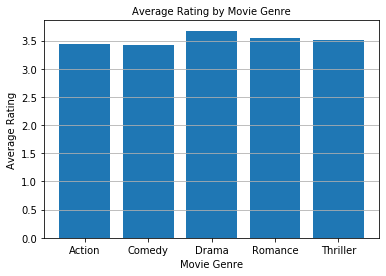

In [179]:
#Visualizing with matplotlib

data = {'Action': 3.443864, 'Comedy': 3.426011, 'Drama': 3.674296, 'Romance': 3.541803, 'Thriller': 3.507111}
genre = list(data.keys())
rating = list(data.values())


fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('Average Rating by Movie Genre', fontsize = 10)
axis.set_xlabel('Movie Genre', fontsize = 10)
axis.set_ylabel('Average Rating', fontsize = 10)

axis.bar(genre, rating)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year')

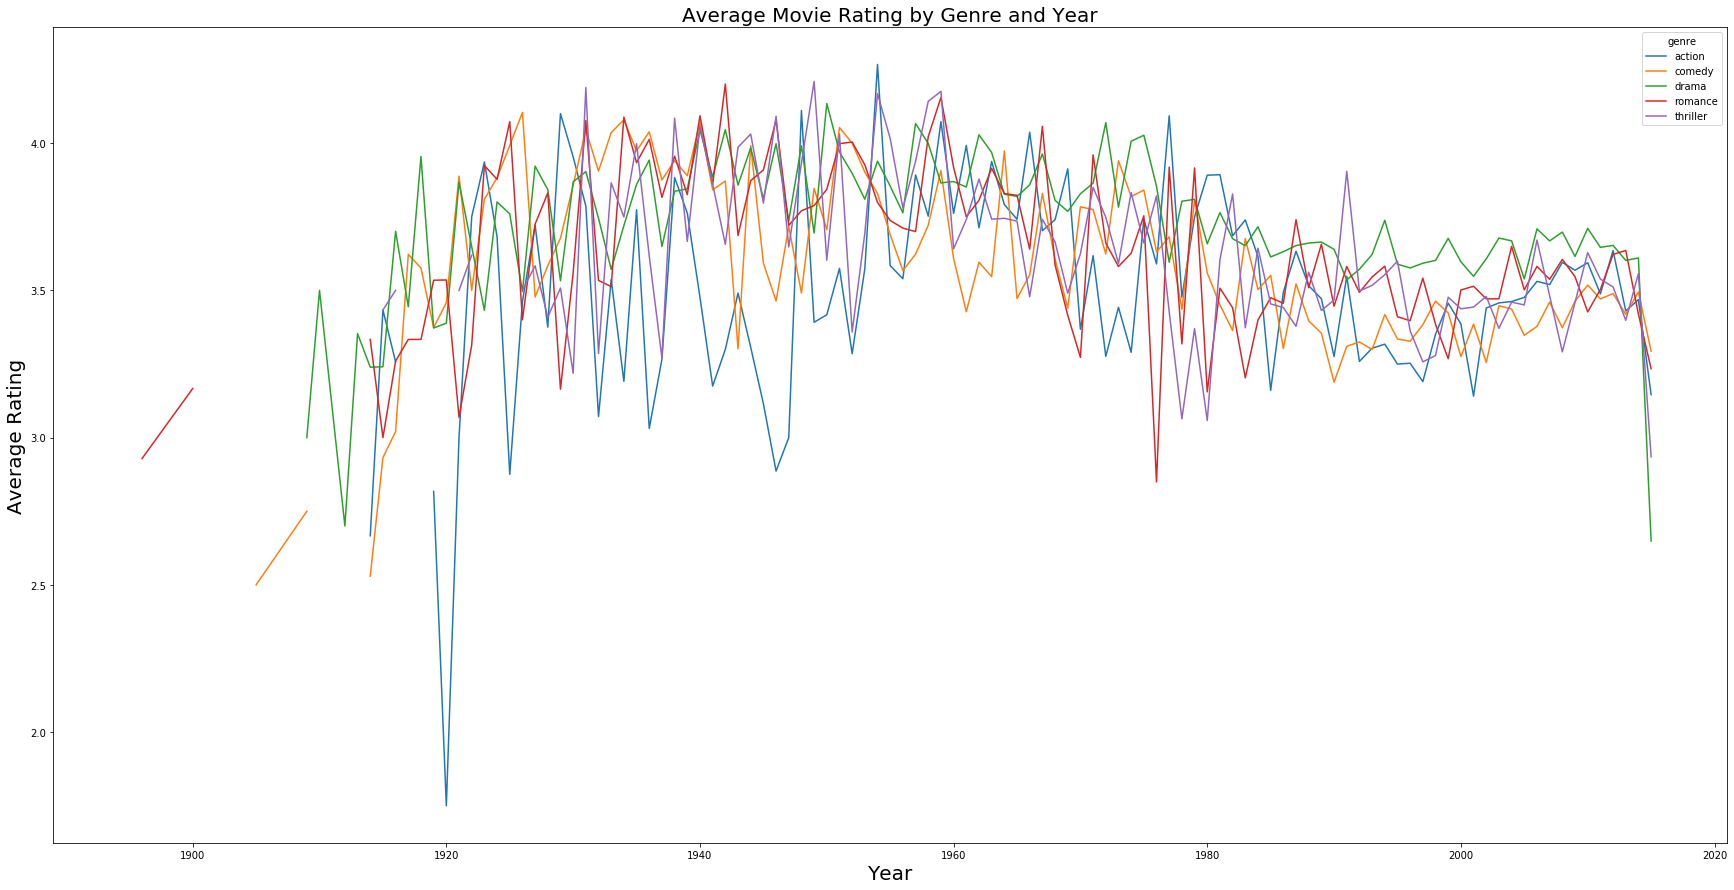

In [180]:
fig, ax = plt.subplots(figsize=(30,15))

movies_ratings.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre')

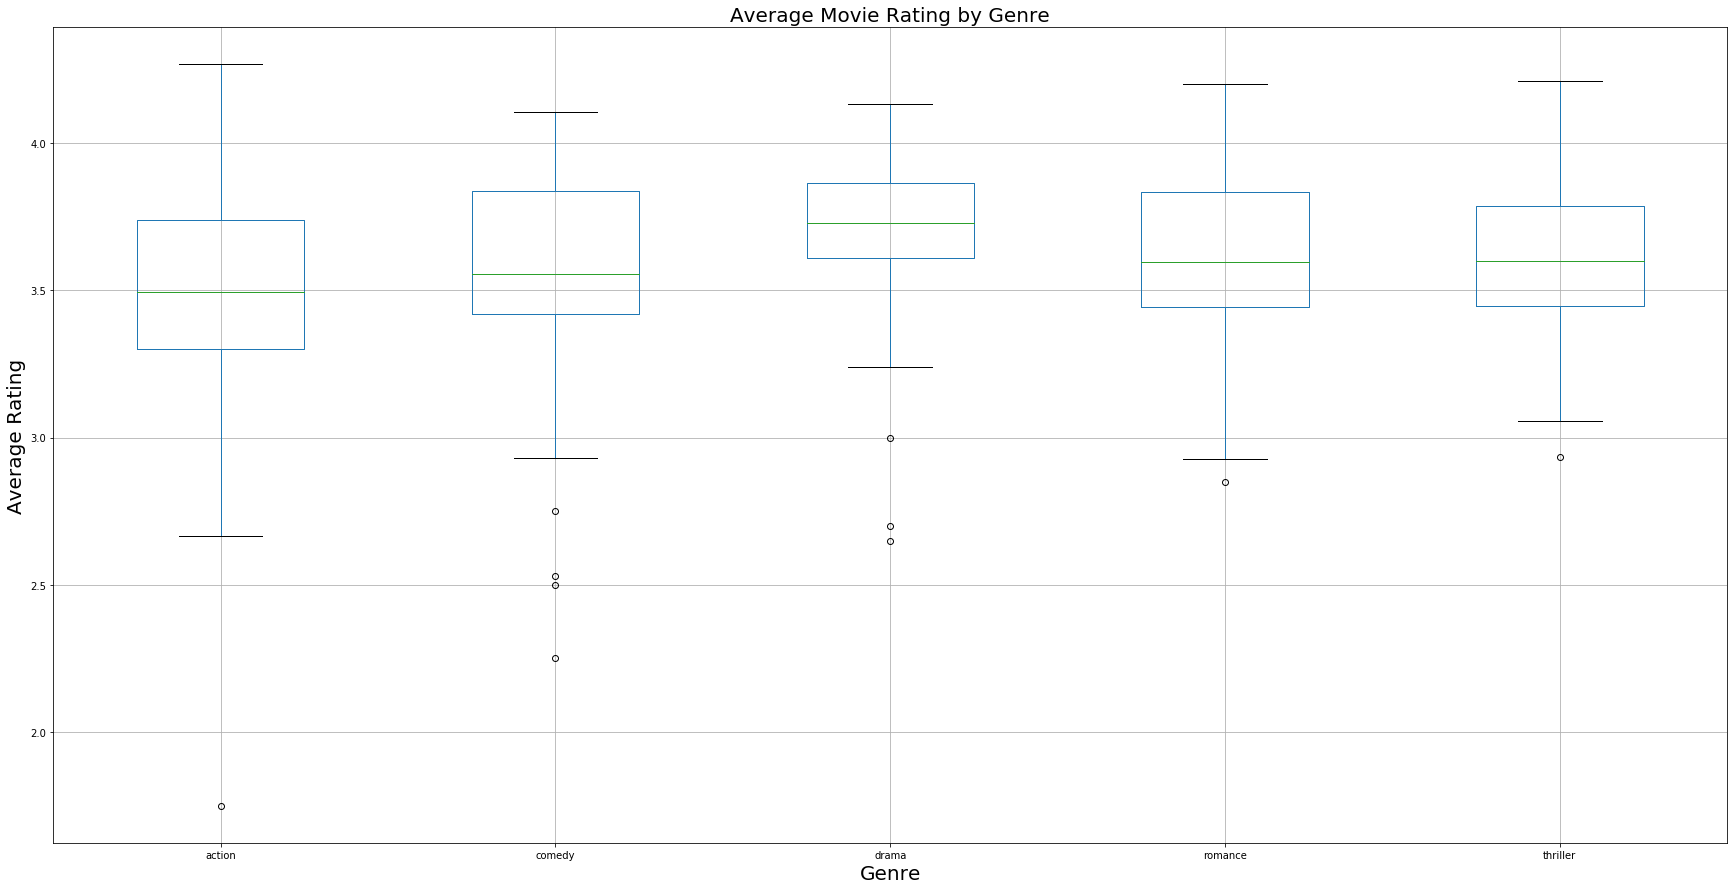

In [181]:
fig, ax = plt.subplots(figsize=(30,15))

movies_ratings.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre', fontsize = 20)

In [182]:
#Create and apply filter for years to make the data more easy to understand. Start by dividing the years in the dataset as evenly as possible into filtered datasets
#Note: range of years is 1891-2015, so dividing into three datasets with 42 years each

early_years = movies_ratings['year'] < 1933
years_1 = movies_ratings[early_years]

years_1.head()

,movieId,title,year,genre,rating
6527597,2102,Steamboat Willie (1928),1928,comedy,3.0
6527598,2102,Steamboat Willie (1928),1928,comedy,1.5
6527599,2102,Steamboat Willie (1928),1928,comedy,3.5
6527600,2102,Steamboat Willie (1928),1928,comedy,5.0
6527601,2102,Steamboat Willie (1928),1928,comedy,2.0


In [183]:
middle_years = ((movies_ratings['year'] >= 1933) & (movies_ratings['year'] < 1975))
years_2 = movies_ratings[middle_years]

years_2.head()

,movieId,title,year,genre,rating
3200259,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,3.0
3200260,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,4.0
3200261,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,4.0
3200262,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,3.0
3200263,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,4.0


In [184]:
late_years = movies_ratings['year'] >= 1975
years_3 = movies_ratings[late_years]

years_3.head()

,movieId,title,year,genre,rating
0,1,Toy Story (1995),1995,comedy,4.0
1,1,Toy Story (1995),1995,comedy,5.0
2,1,Toy Story (1995),1995,comedy,4.0
3,1,Toy Story (1995),1995,comedy,4.0
4,1,Toy Story (1995),1995,comedy,4.5


In [185]:
#Groupby and aggregate analysis on the year-divided datasets

groupby_years_1 = years_1[['genre', 'rating']].groupby('genre').mean()

groupby_years_1

,rating
genre,
action,3.847757
comedy,3.892107
drama,3.825211
romance,3.811227
thriller,4.038592


In [186]:
groupby_years_2 = years_2[['genre', 'rating']].groupby('genre').mean()

groupby_years_2

,rating
genre,
action,3.763458
comedy,3.813188
drama,3.914338
romance,3.915185
thriller,3.873001


In [187]:
groupby_years_3 = years_3[['genre', 'rating']].groupby('genre').mean()

groupby_years_3

,rating
genre,
action,3.425726
comedy,3.396040
drama,3.640905
romance,3.495739
thriller,3.478192


Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1891-1932')

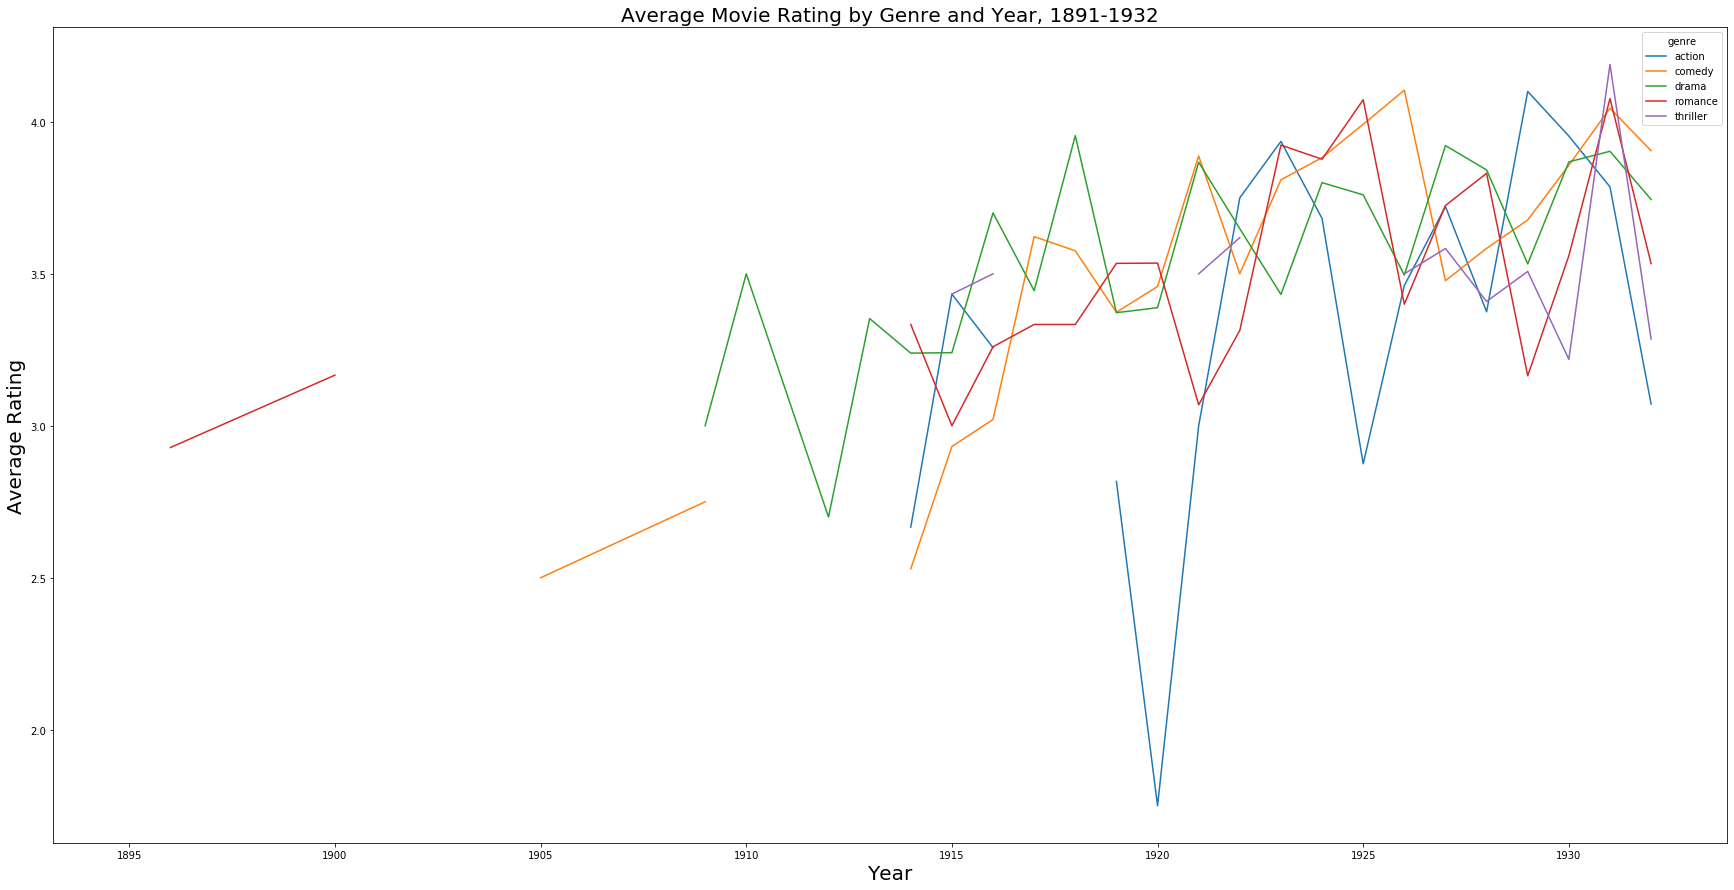

In [188]:
#Graph the datasets with smaller year spans

fig, ax = plt.subplots(figsize=(30,15))

years_1.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1891-1932', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1933-1974')

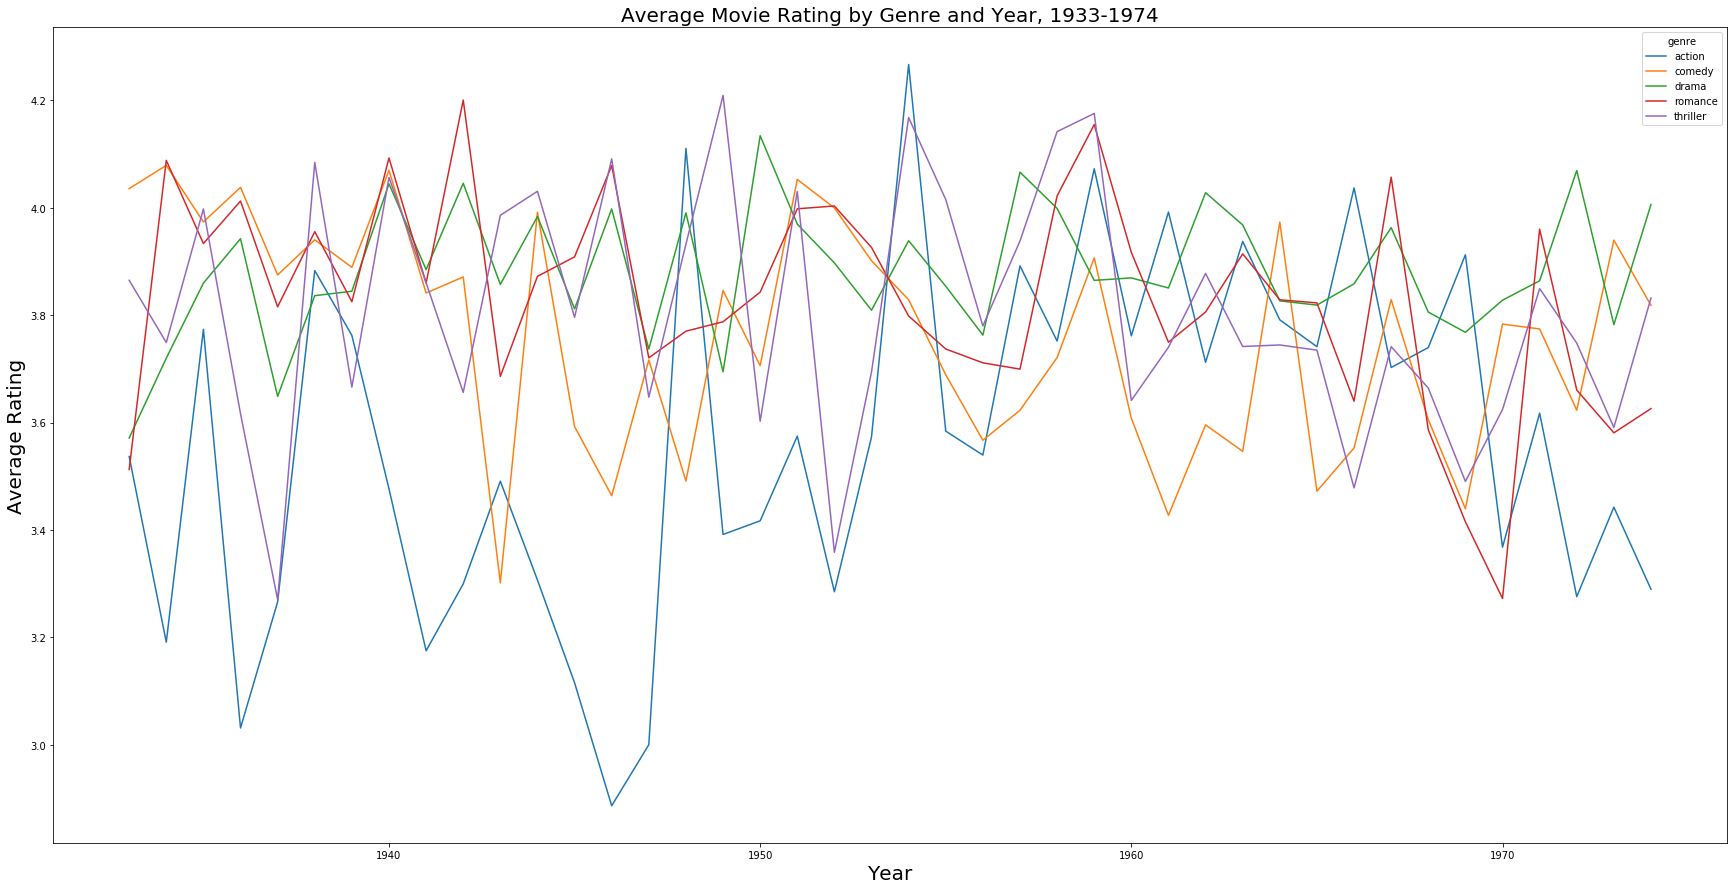

In [189]:
fig, ax = plt.subplots(figsize=(30,15))

years_2.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1933-1974', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1975-2015')

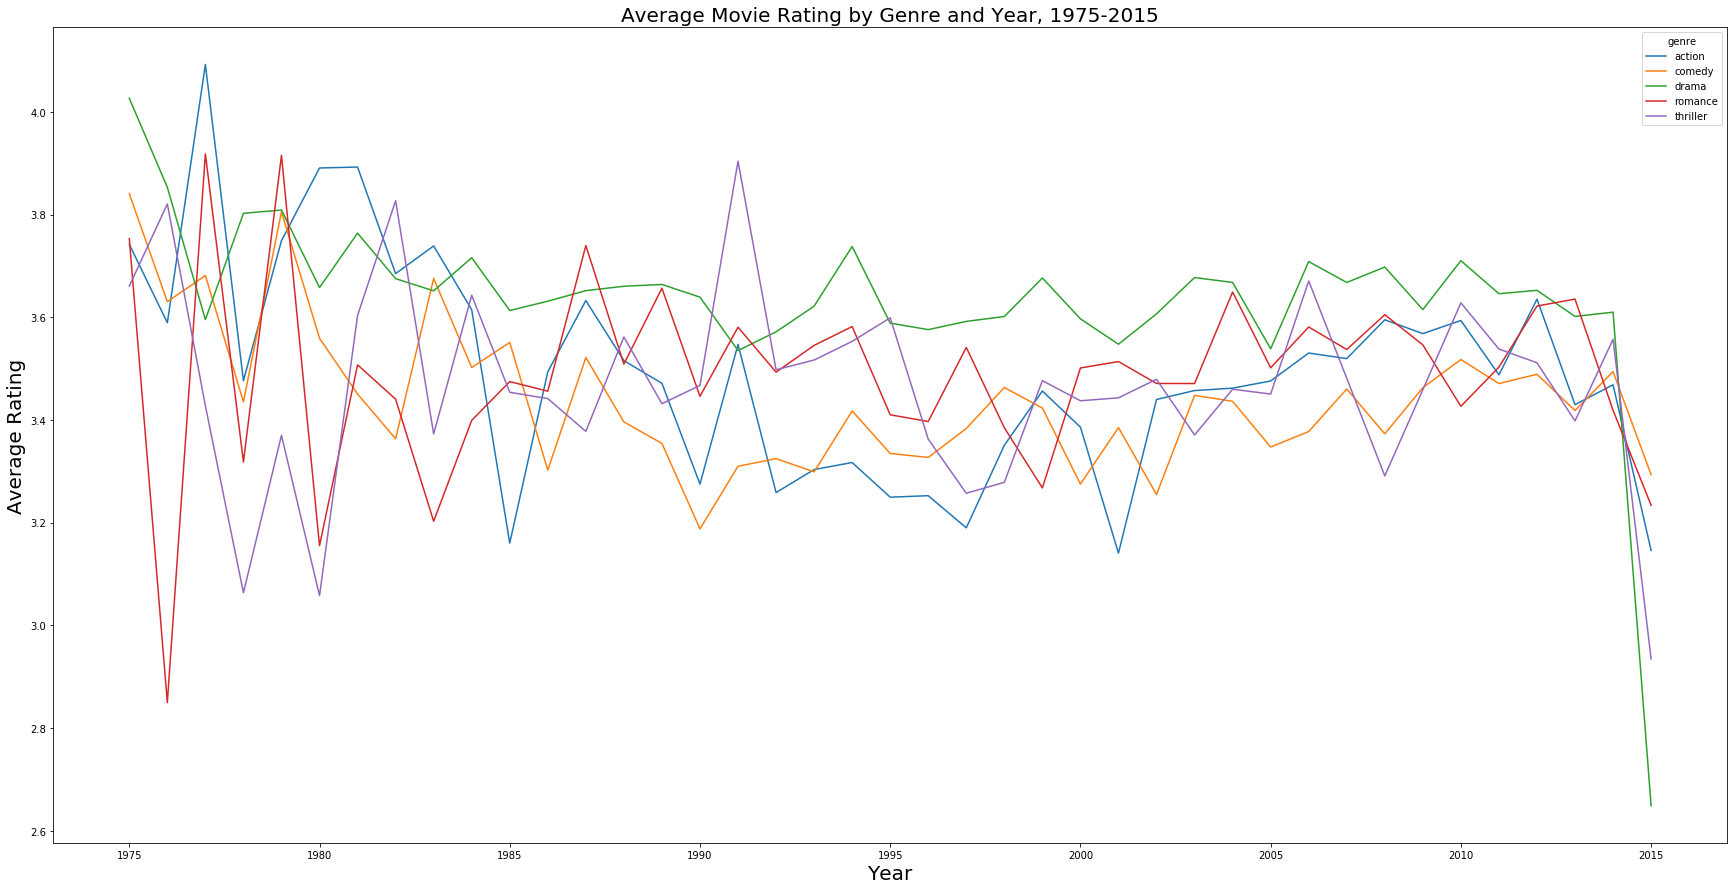

In [190]:
fig, ax = plt.subplots(figsize=(30,15))

years_3.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1975-2015', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1891-1932')

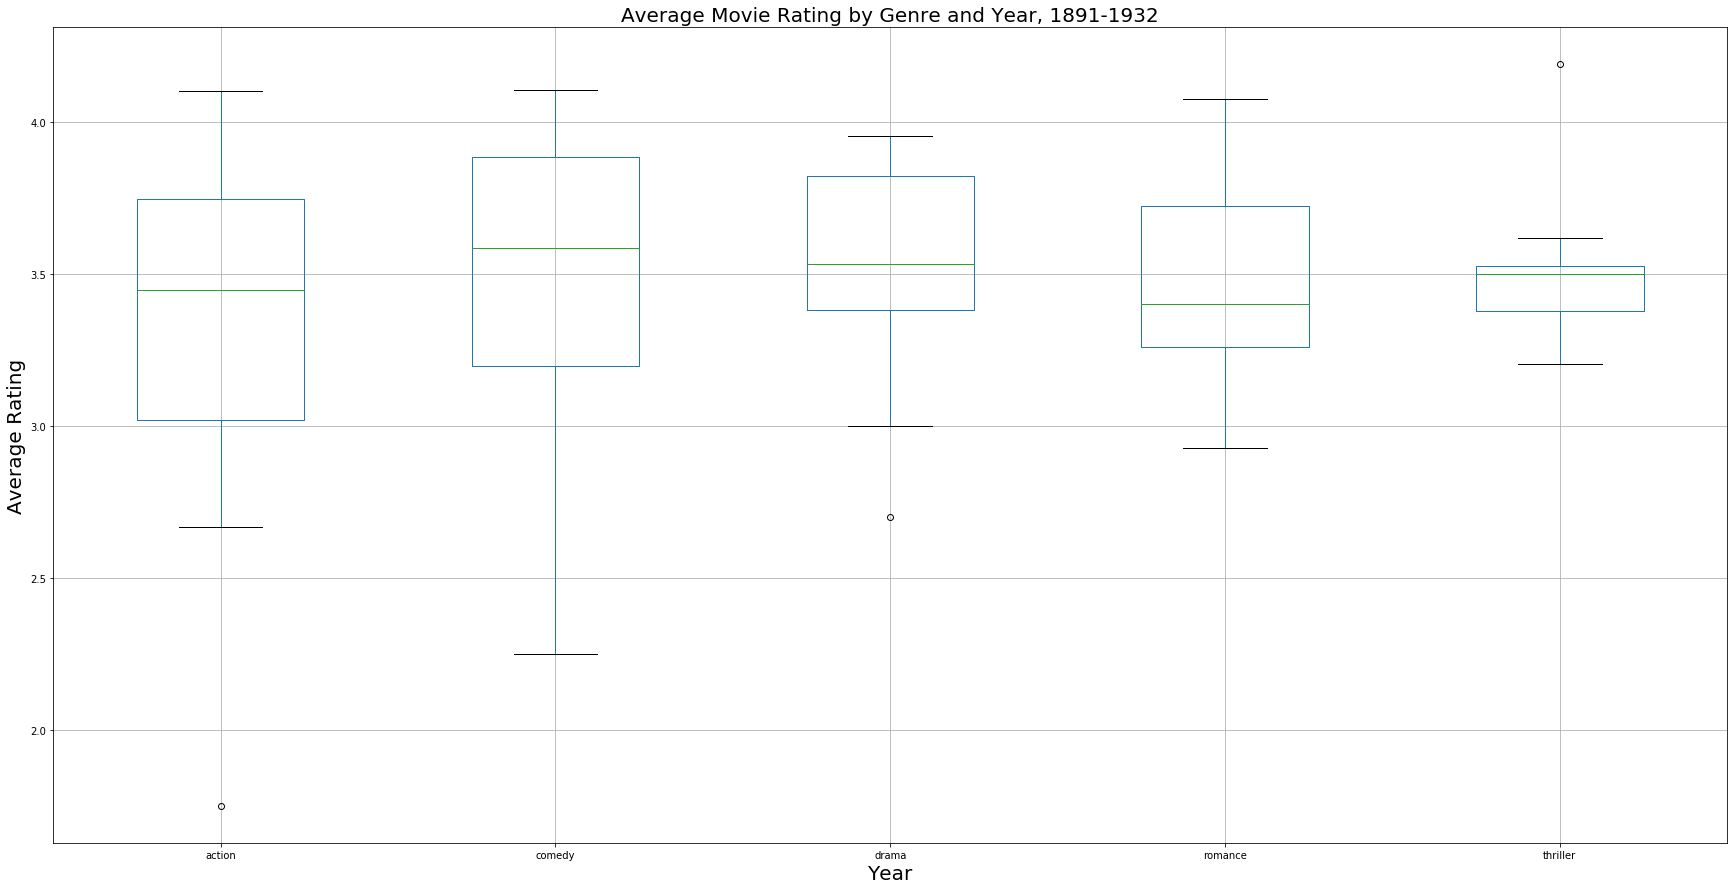

In [218]:
#Graph boxplots to see distributions of yearspans

fig, ax = plt.subplots(figsize=(30,15))

years_1.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1891-1932', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1933-1974')

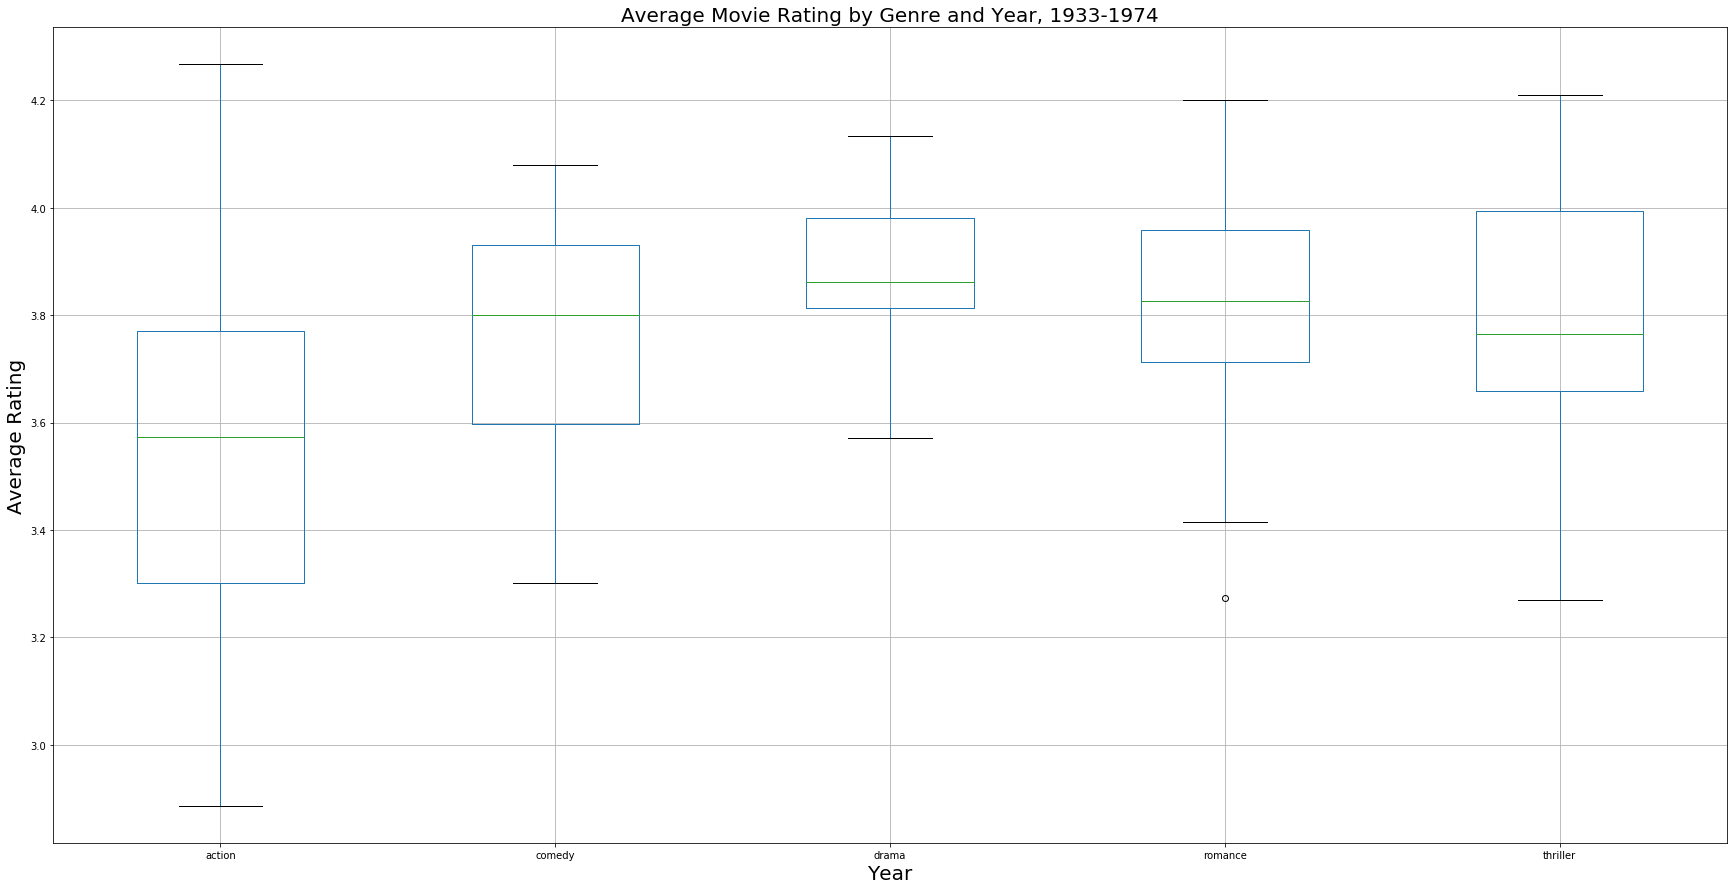

In [219]:
fig, ax = plt.subplots(figsize=(30,15))

years_2.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1933-1974', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1975-2015')

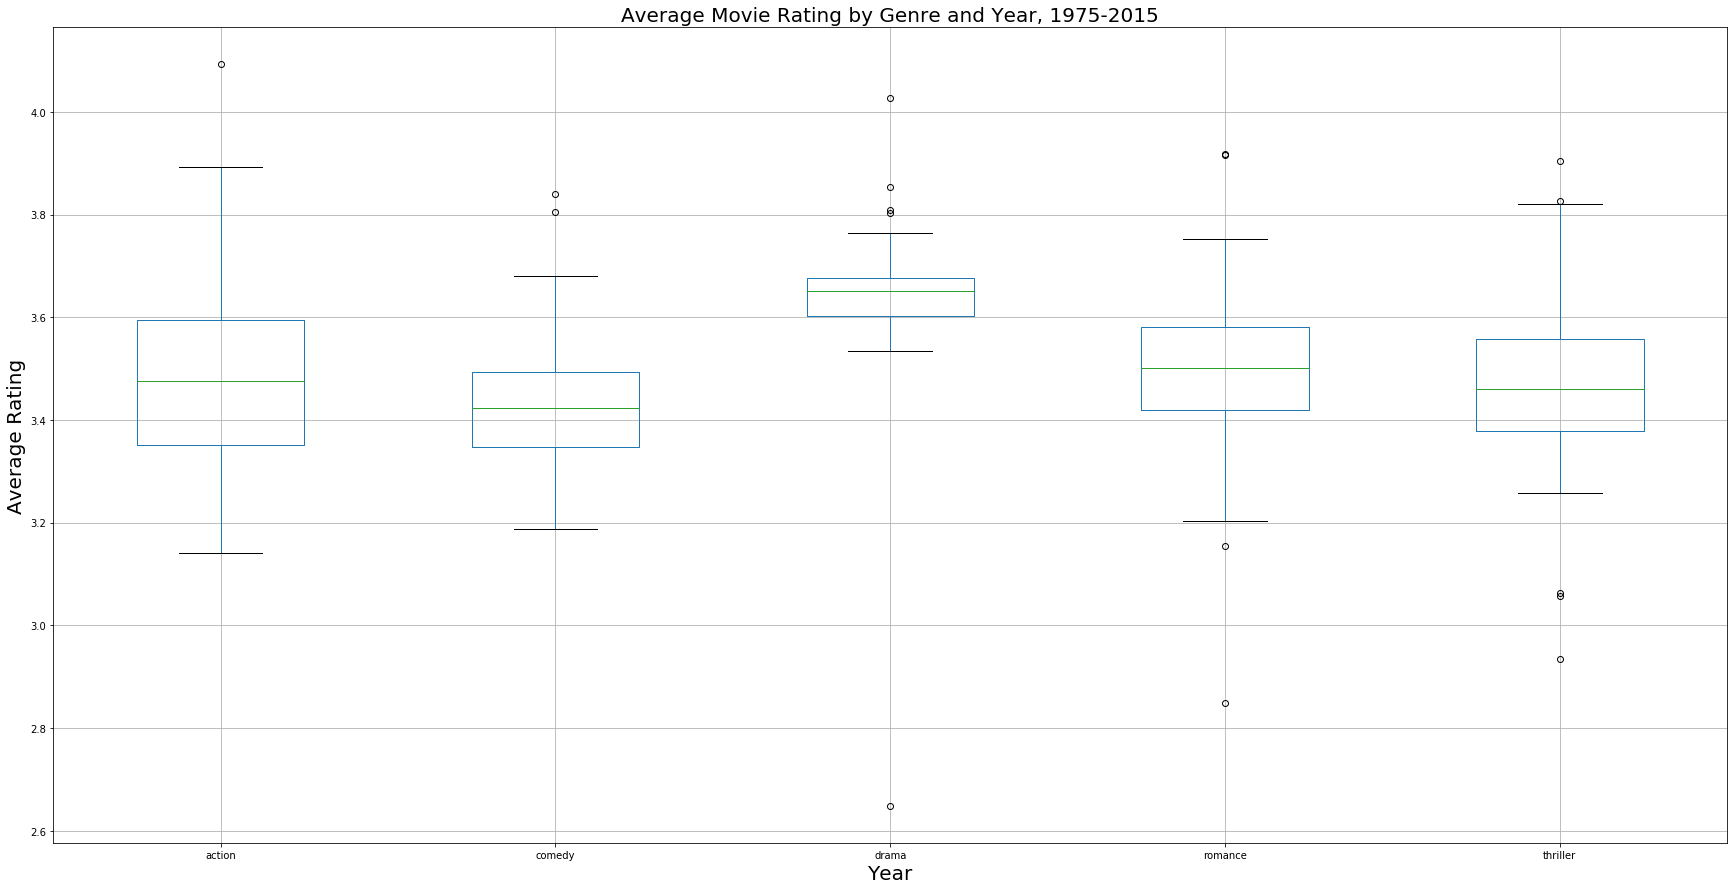

In [220]:
fig, ax = plt.subplots(figsize=(30,15))

years_3.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1975-2015', fontsize = 20)

In [191]:
#To get a more accurate look at the early years (which did not have all 5 genres represented until ~1915), re-run analysis

#Re-create and apply filter for years to make the data more easy to understand
#Note: range of years is 1915-2015, so dividing into four datasets produces an even 25 years of data in each

new_early_years = ((movies_ratings['year'] >= 1915) & (movies_ratings['year'] < 1940))
new_years_1 = movies_ratings[new_early_years]

new_years_1.head()

,movieId,title,year,genre,rating
3658607,905,It Happened One Night (1934),1934,comedy,3.0
3658608,905,It Happened One Night (1934),1934,comedy,4.0
3658609,905,It Happened One Night (1934),1934,comedy,5.0
3658610,905,It Happened One Night (1934),1934,comedy,3.5
3658611,905,It Happened One Night (1934),1934,comedy,5.0


In [192]:
new_middle_years = ((movies_ratings['year'] >= 1940) & (movies_ratings['year'] < 1965))
new_years_2 = movies_ratings[new_middle_years]

new_years_2.head()

,movieId,title,year,genre,rating
3328454,750,Dr. Strangelove or: How I Learned to Stop Worr...,1964,comedy,5.0
3328455,750,Dr. Strangelove or: How I Learned to Stop Worr...,1964,comedy,4.0
3328456,750,Dr. Strangelove or: How I Learned to Stop Worr...,1964,comedy,3.0
3328457,750,Dr. Strangelove or: How I Learned to Stop Worr...,1964,comedy,5.0
3328458,750,Dr. Strangelove or: How I Learned to Stop Worr...,1964,comedy,5.0


In [193]:
upper_middle_years = ((movies_ratings['year'] >= 1965) & (movies_ratings['year'] < 1990))
new_years_3 = movies_ratings[upper_middle_years]

new_years_3.head()

,movieId,title,year,genre,rating
3200259,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,3.0
3200260,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,4.0
3200261,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,4.0
3200262,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,3.0
3200263,615,Bread and Chocolate (Pane e cioccolata) (1973),1973,comedy,4.0


In [194]:
new_late_years = movies_ratings['year'] >= 1990
new_years_4 = movies_ratings[new_late_years]

new_years_4.head()

,movieId,title,year,genre,rating
0,1,Toy Story (1995),1995,comedy,4.0
1,1,Toy Story (1995),1995,comedy,5.0
2,1,Toy Story (1995),1995,comedy,4.0
3,1,Toy Story (1995),1995,comedy,4.0
4,1,Toy Story (1995),1995,comedy,4.5


In [195]:
#Check the length of each dataset

len(new_years_1)

260718

In [196]:
len(new_years_2)

1434652

In [197]:
len(new_years_3)

6071308

In [198]:
len(new_years_4)

23322395

In [199]:
#Groupby and aggregate analysis on the new year-divided datasets

new_groupby_years_1 = new_years_1[['genre', 'rating']].groupby('genre').mean()

new_groupby_years_1

,rating
genre,
action,3.711400
comedy,3.966655
drama,3.795083
romance,3.888981
thriller,3.941071


In [200]:
new_groupby_years_2 = new_years_2[['genre', 'rating']].groupby('genre').mean()

new_groupby_years_2

,rating
genre,
action,3.911176
comedy,3.833350
drama,3.941978
romance,3.941506
thriller,3.962787


In [201]:
new_groupby_years_3 = new_years_3[['genre', 'rating']].groupby('genre').mean()

new_groupby_years_3

,rating
genre,
action,3.649198
comedy,3.527763
drama,3.748925
romance,3.578835
thriller,3.588192


In [202]:
new_groupby_years_4 = new_years_4[['genre', 'rating']].groupby('genre').mean()

new_groupby_years_4

,rating
genre,
action,3.363880
comedy,3.370040
drama,3.628965
romance,3.487528
thriller,3.468903


Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1915-1939')

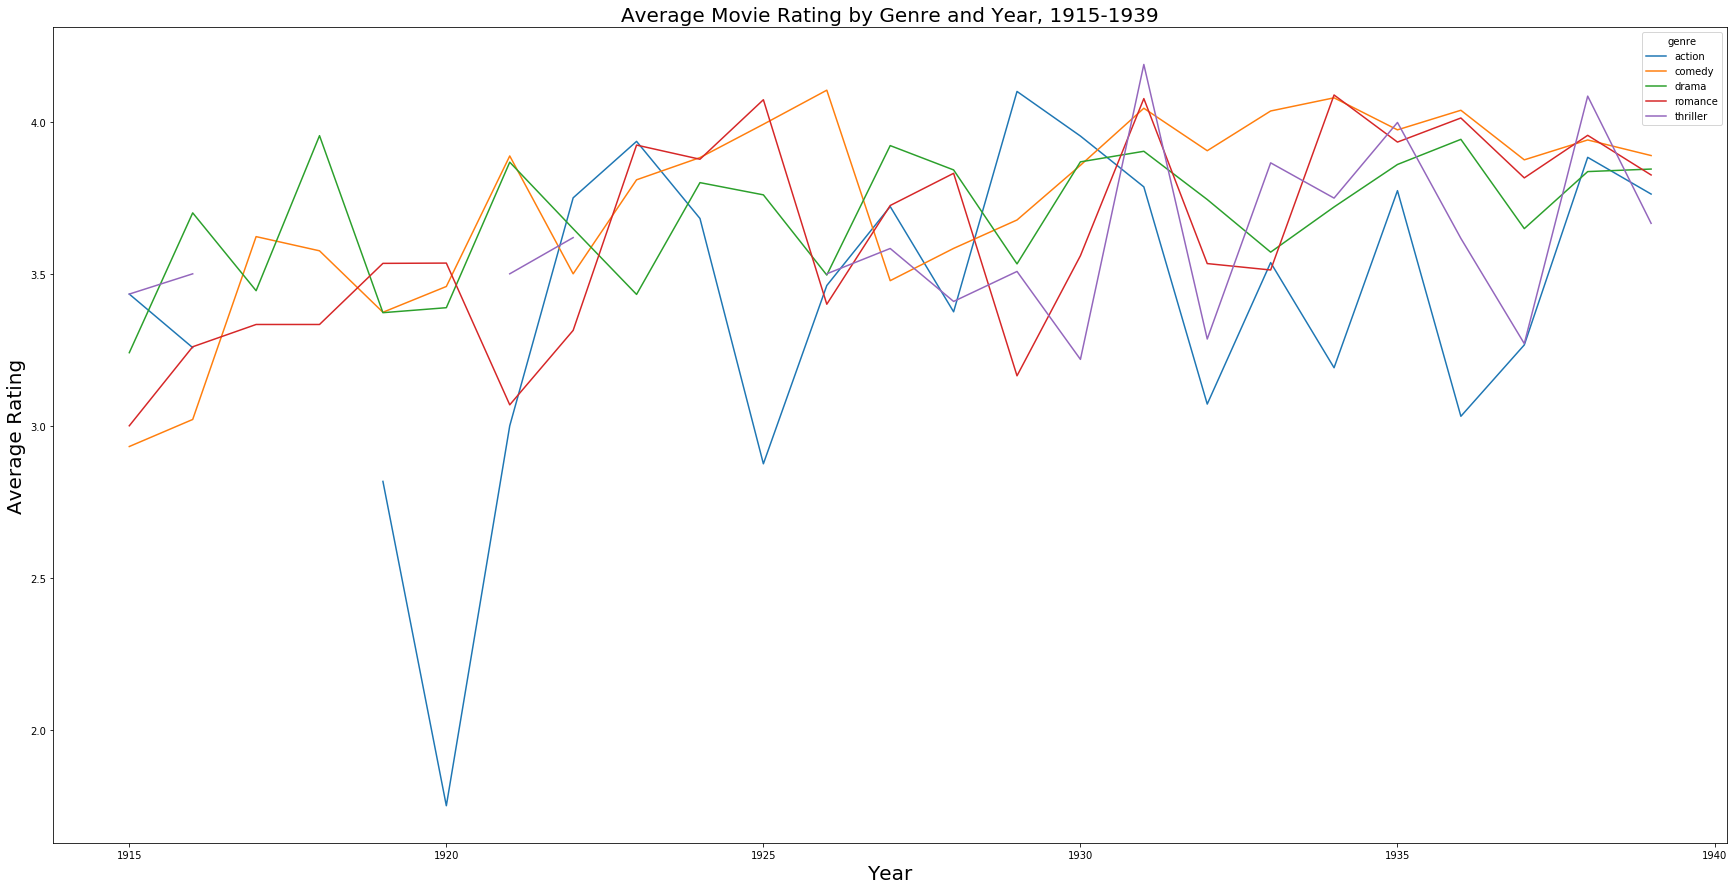

In [205]:
#Graph the new datasets with smaller year spans

fig, ax = plt.subplots(figsize=(30,15))

new_years_1.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1915-1939', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1940-1964')

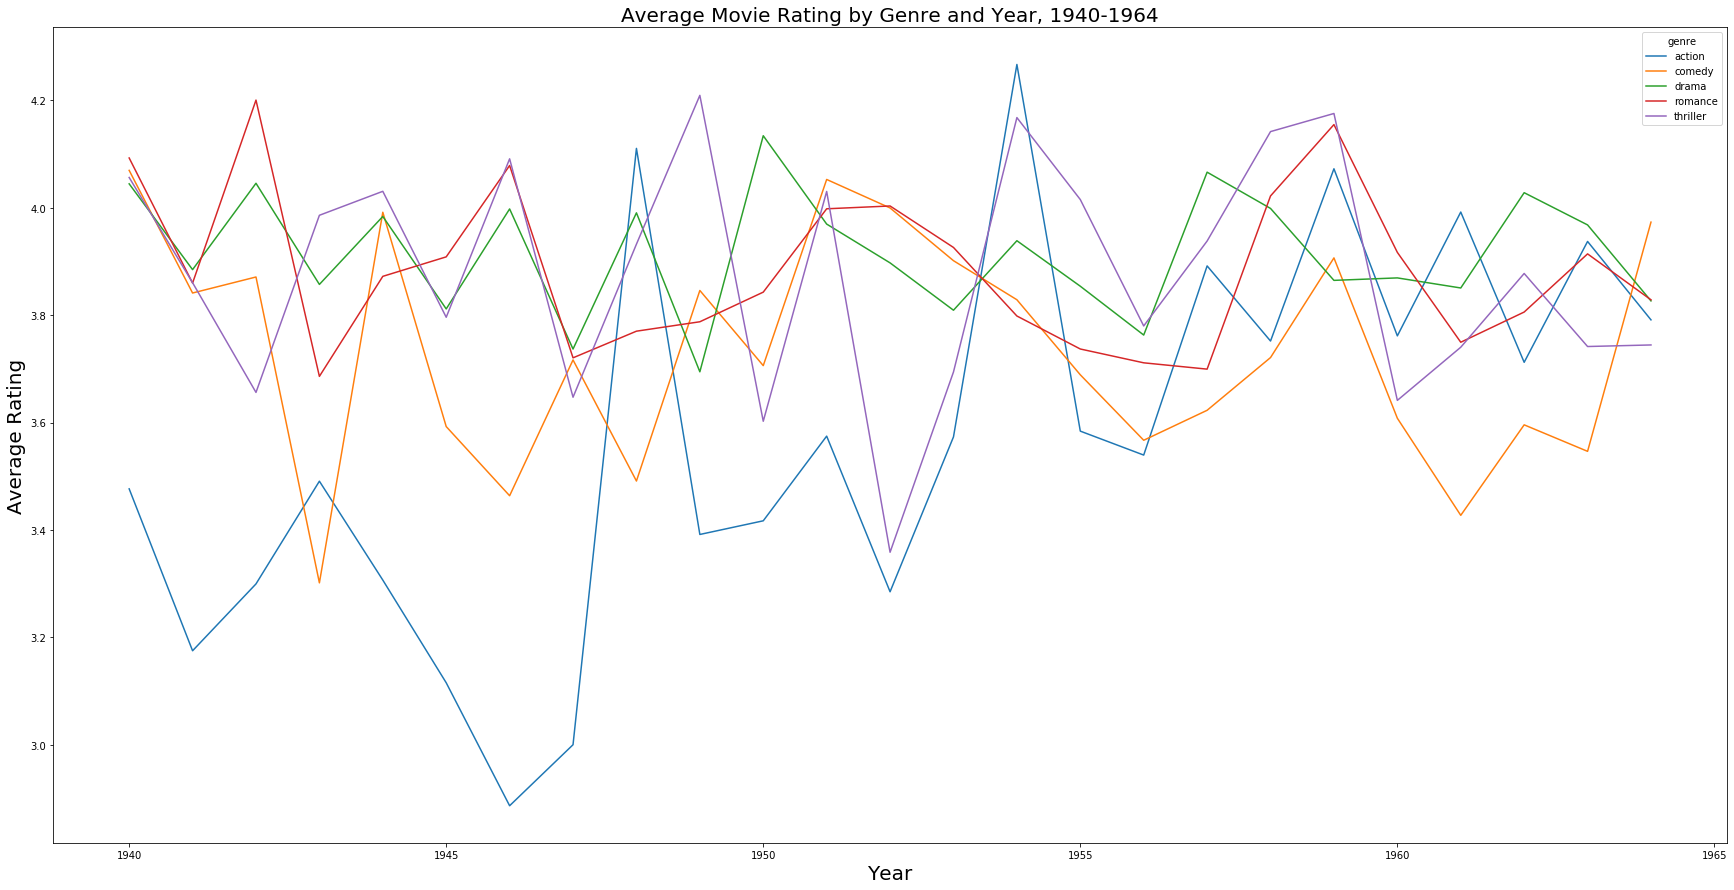

In [206]:
fig, ax = plt.subplots(figsize=(30,15))

new_years_2.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1940-1964', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1965-1989')

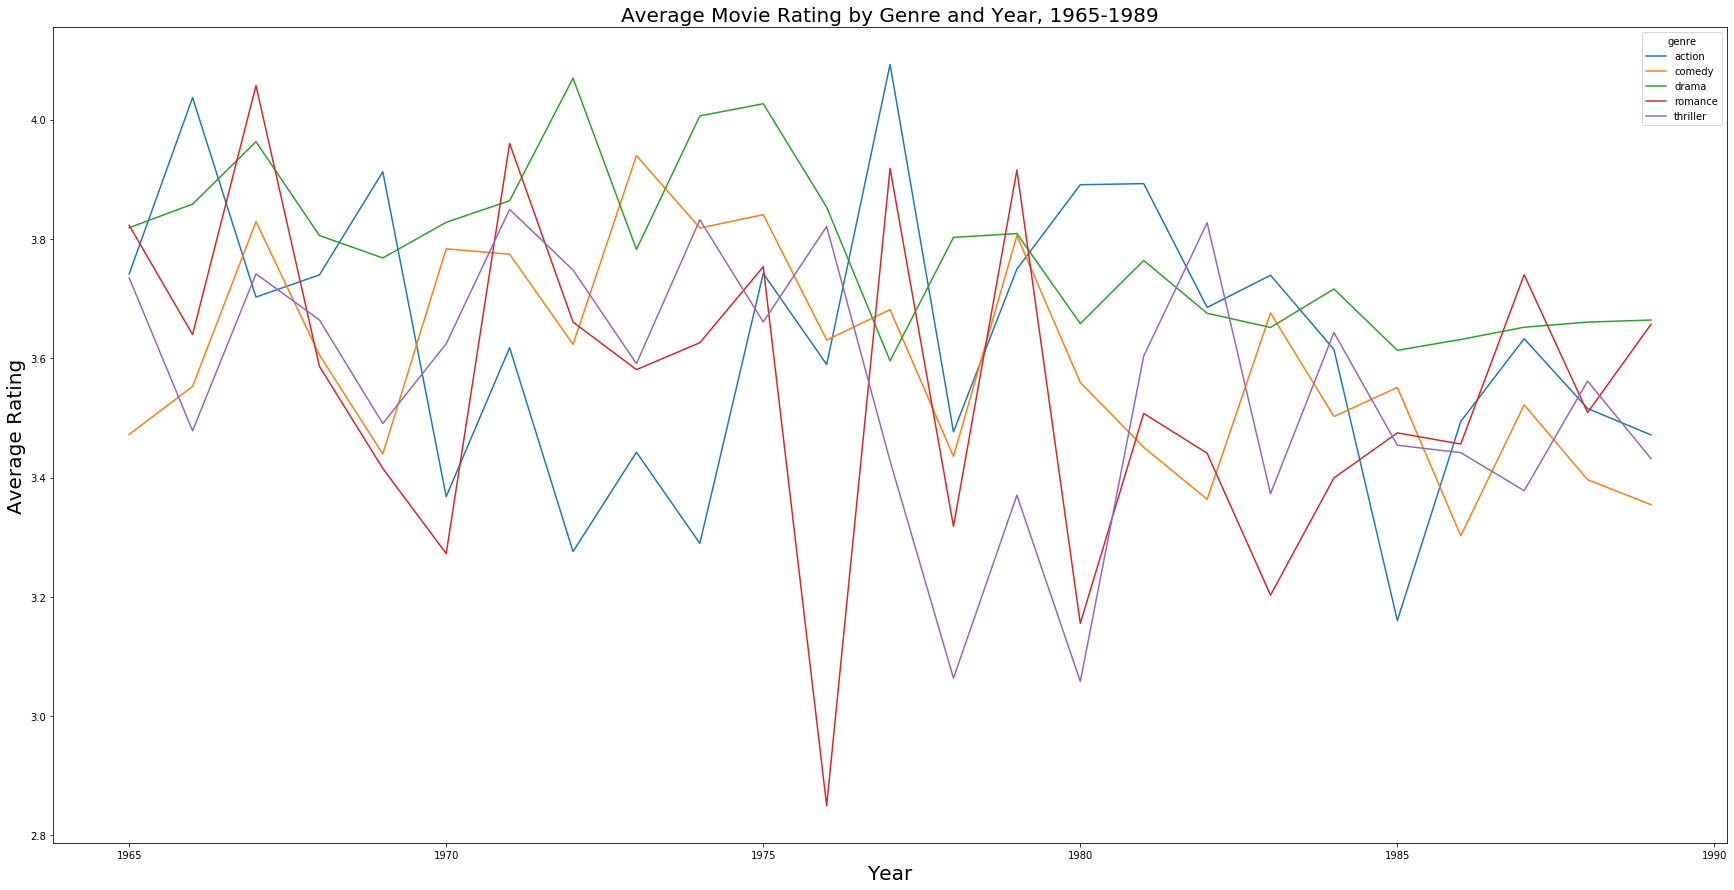

In [207]:
fig, ax = plt.subplots(figsize=(30,15))

new_years_3.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1965-1989', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1990-2015')

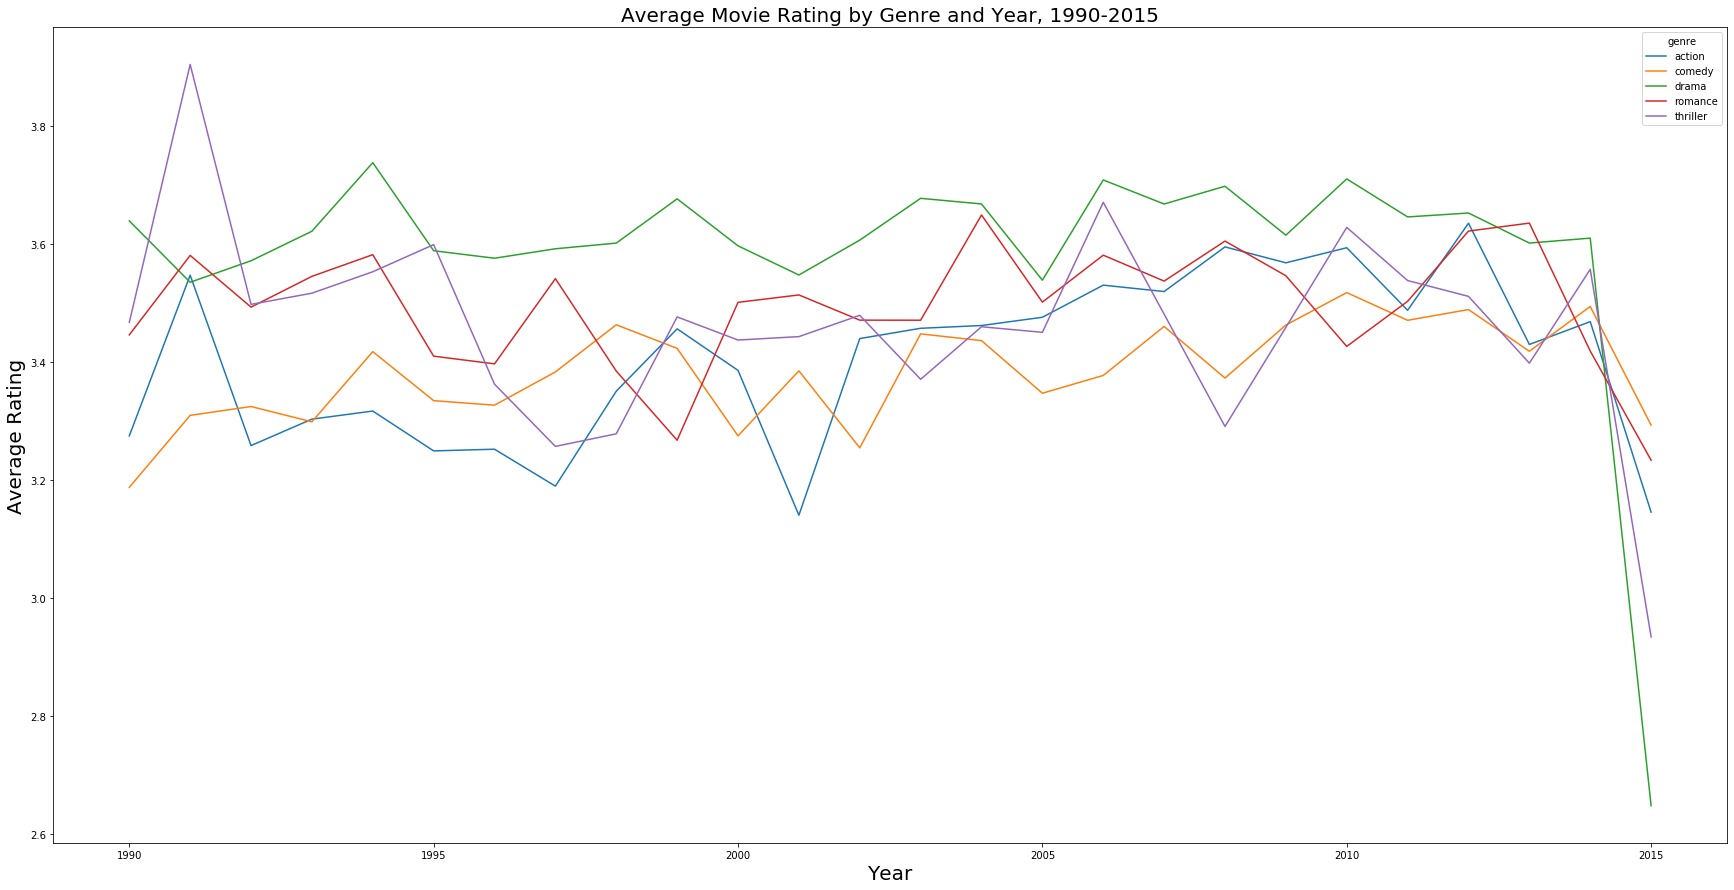

In [208]:
fig, ax = plt.subplots(figsize=(30,15))

new_years_4.groupby(['year', 'genre']).mean()['rating'].unstack().plot(ax=ax)

ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1990-2015', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1915-1939')

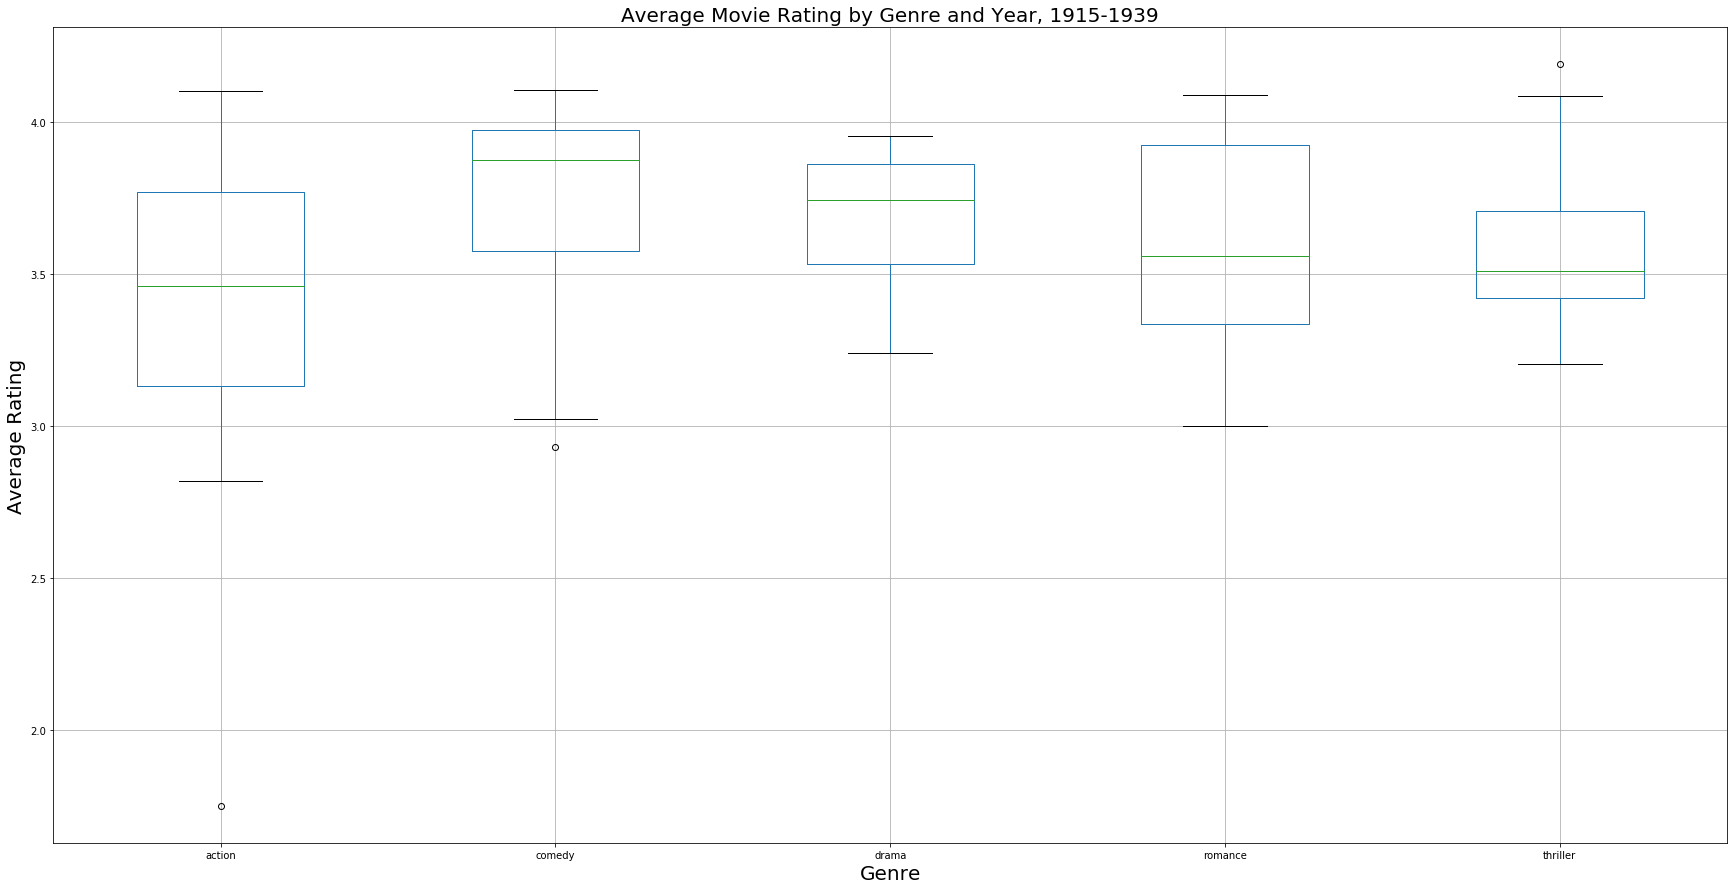

In [209]:
#Graph boxplots to see distributions of new yearspans

fig, ax = plt.subplots(figsize=(30,15))

new_years_1.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1915-1939', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1940-1964')

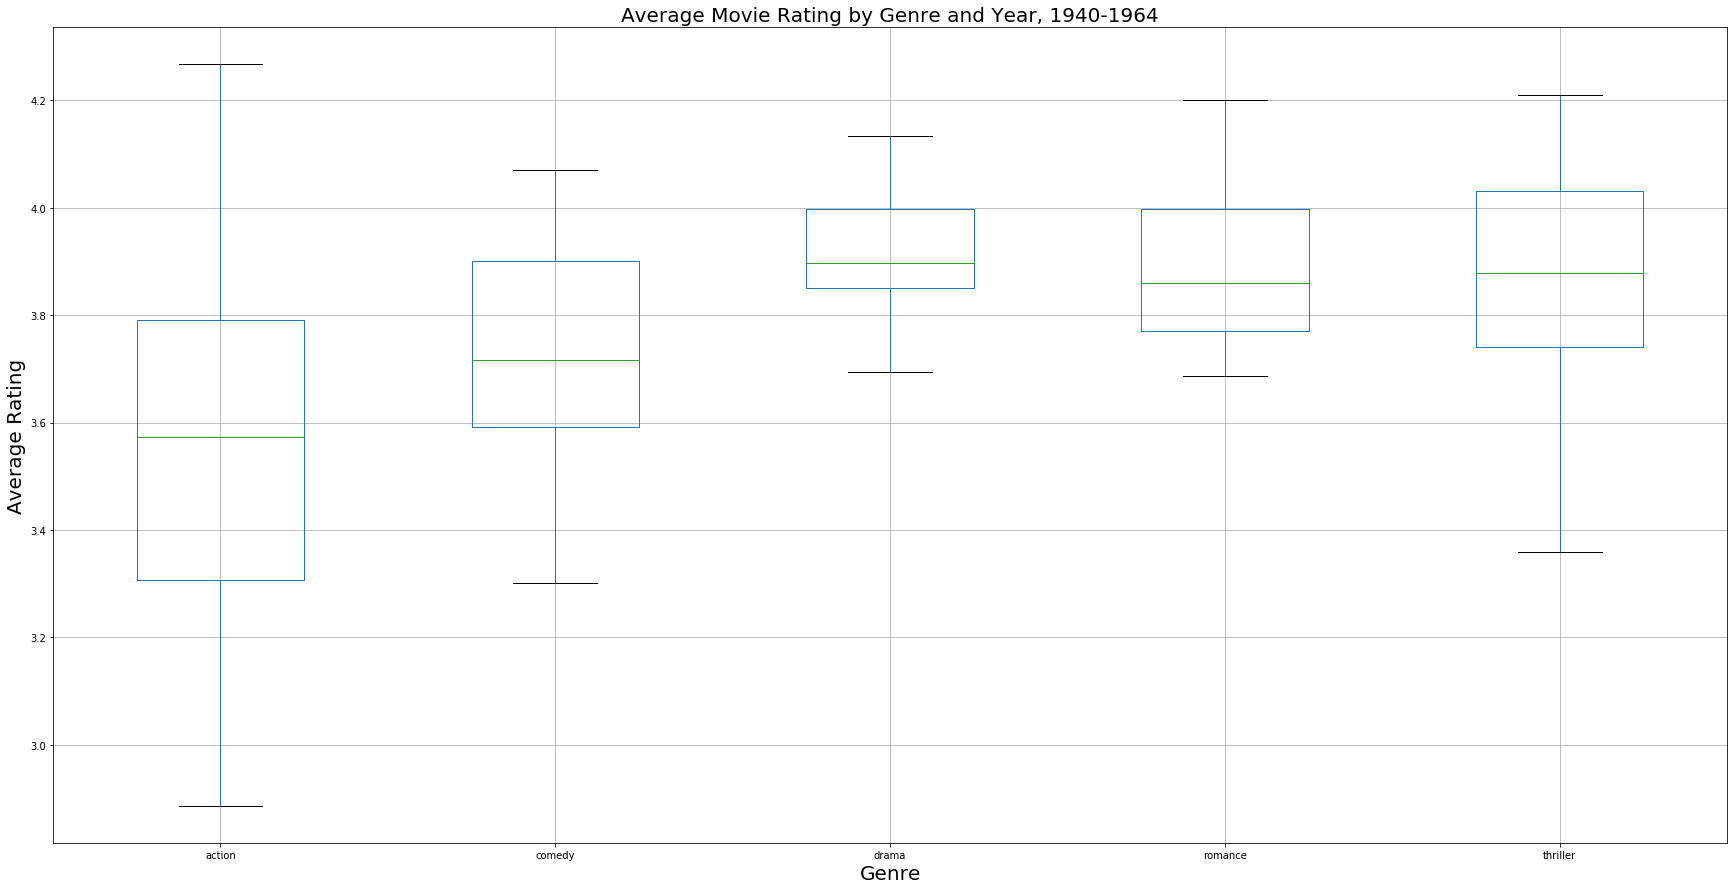

In [210]:
fig, ax = plt.subplots(figsize=(30,15))

new_years_2.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1940-1964', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1965-1989')

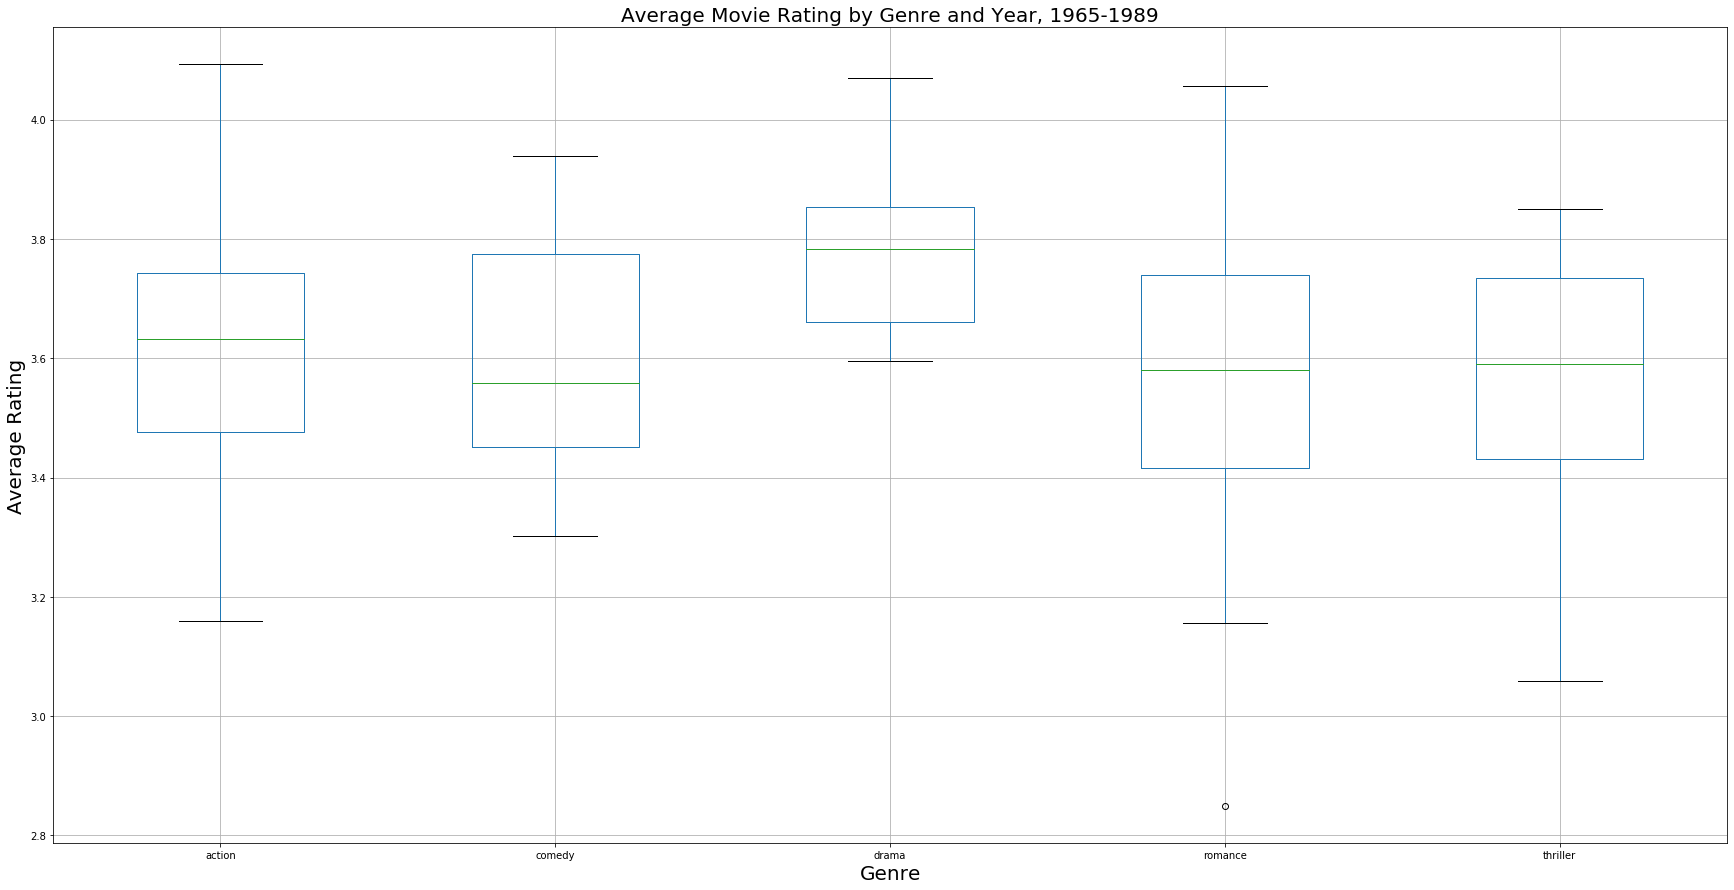

In [211]:
fig, ax = plt.subplots(figsize=(30,15))

new_years_3.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1965-1989', fontsize = 20)

Text(0.5, 1.0, 'Average Movie Rating by Genre and Year, 1990-2015')

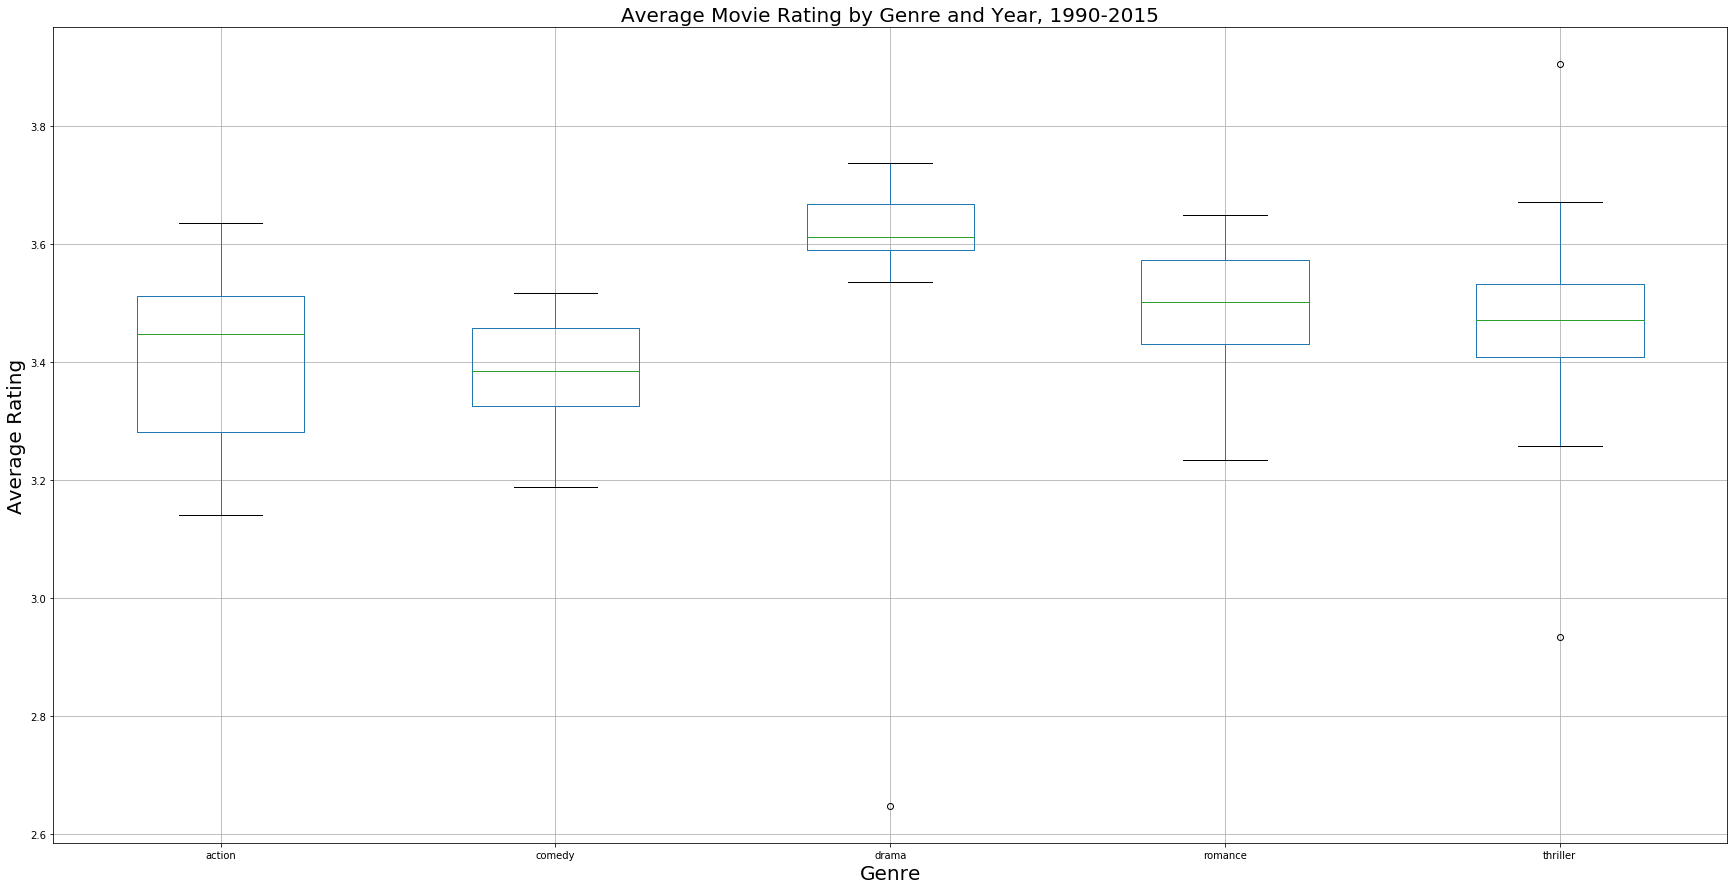

In [212]:
fig, ax = plt.subplots(figsize=(30,15))

new_years_4.groupby(['year', 'genre']).mean()['rating'].unstack().boxplot(ax=ax)

ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Average Rating', fontsize = 20)
ax.set_title('Average Movie Rating by Genre and Year, 1990-2015', fontsize = 20)